## Eclipsing Light Curves

System 1: equal mass (i.e. equal luminosity, radii, temperature, etc.) main-sequence stellar binary.  
System 2: Jupiter-sized planet orbiting a Sun-like star.

Questions:
1. If both systems are observed exactly edge-on (i.e., the observer is exactly in the orbital plane), what is the maximal depth of the eclipses? Give it in fractional dimming compared to 1 (observed flux / brightness when no eclipse) -- e.g., 0.1 corresponds to 10% of flux being eclipsed.
2. Does the answer depend on the assumed separation? If yes, assume 0.1 AU.
3. Can you simulate a light curve for System 2 and with orbital separation 0.1 AU and make a plot?
4. If both systems are observed slightly edge-off, but still in a situation when we see eclipses, how does the depth of the eclipse change for System 1 and System 2?
5. If no change in depth of the eclipse, what does change when we change the inclination slightly?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

## System 1

Consider two isotropic, opaque, ideal blackbody-radiating spheres of mass $M$. Since both spheres model main-sequence stars, the radius of the star has a roughly linear relationship with its mass.

Assume that the two stars are not very close (i.e. negligible shape distortion from gravity/rotation). Also assume that the observer is very far away from the binary system (i.e. the change in flux due to the change in distance from orbital motion is negligible). One more assumption is that the orbit is perfectly circular.

At brightest, both stars are fully visible. WLOG, let the flux in this situation be $1$.

When viewed exactly edge-on, maximal depth occurs when one star is completely hidden by the other. Therefore, the maximal depth is $0.5$. This value does not depend on the assumed separation, since the physical radii of the two stars and equal and can therefore always completely cover each other.

In the case that the observation does not occur exactly edge-on, the assumed separation begins to matter. Assume this separation is $a = 0.1 AU$. Further, assume that the stars have mass (and radius) equal to the Sun. The radii of the stars is then $R = 0.00465 AU$.

Let the inclination of the orbital plane relative to the observer be $\theta$.

At maximal occultation, the projected separation of the centers of the stars is equal to the physical separation times the sine of the inclination:

$$ y = a \sin{\theta} $$

When $y < 2R$, the covered area is equal to:

$$ A_{covered} = \pi R^2 - y \sqrt{R^2 - (\frac{y}{2})^2} - 2R^2 \arctan{(\frac{y/2}{\sqrt{R^2 - (\frac{y}{2})^2}})} $$

The ratio between the covered area and the total luminescent area facing the observer is the total amount of dimming. Then, the maximal depth can be expressed as:

$$ depth = \frac{A_{covered}}{2\pi R^2} $$

$$ depth = \frac{1}{2} - \frac{y\sqrt{R^2-(y/2)^2}}{2\pi R^2} - \frac{1}{\pi}\arctan{(\frac{y/2}{\sqrt{R^2-(y/2)^2}})} $$

Note that this agrees with the limiting case of $ y \rightarrow 0$. Below, maximal depth is plotted as a function of inclination.

In [2]:
a = 0.1
R = 0.00465
divs = 10000
theta = np.linspace(0, np.pi/2, num=divs)
depth = np.zeros((divs))
max_theta = 0

for i in range(divs):
    y = a * np.sin(theta[i])
    if y > 2*R:
        max_theta = i-1
        break
    st = np.sqrt(R**2 - (y/2)**2)
    depth[i] = 0.5 - (y*st)/(2*np.pi*R**2) - np.arctan(y/(2*st))/np.pi

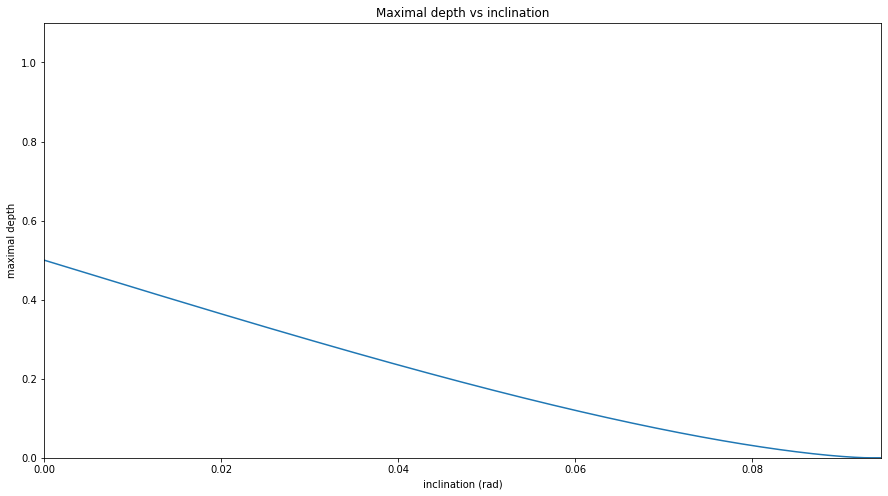

In [3]:
plt.figure(figsize=(15,8))
plt.ylim((0, 1.1))
plt.xlim((0, theta[max_theta+10]))
plt.plot(theta, depth)
plt.title("Maximal depth vs inclination")
plt.ylabel("maximal depth")
plt.xlabel("inclination (rad)")
plt.show()

As can be clearly seen, the stars no longer occult one another at a mere $0.1\space rad$.

## System 2

Let the star be modelled identically as before. Further, model the planet be another opaque sphere, but giving off zero radiation. Use the same assumptions as before. WLOG, let the unocculted flux of the star be $1$. The radius of the star is $0.00465 AU$, and the radius of the planet is $0.000467 AU$.

In the case that the system is viewed edge-on, the maximal depth can be calculated by subtracting the area of the planet's shadow from the area of the star's shadow.

$$ depth = \frac{A_{planet}}{A_\odot} $$

$$ depth = \frac{R_p^2}{R_\odot^2} $$

$$ depth = 0.01009 $$

As before, the maximal depth for the edge-on case is independent of the separation.

Now, consider the situation where the planet is at the edge of the star, where part of the planet's shadow is not covering the star. Let the projected separation between the center of the planet and the star be $d$. Further, let the phase of the orbit be 0 when the planet is directly behind the star. Then, $d = a\sin{\phi}$, where $\phi$ is the orbital phase and $a$ is the physical separation as before.

The expression for the total covered area when $ (R_\odot - R_p) < d < (R_\odot + R_p) $ is:

$$ area = R_p^2 \phi_p - hx_p + R_\odot^2 \phi_\odot - hx_\odot $$

where $h$ is the maximal height of the overlapping area, given by:

$$ h = \frac{1}{2d} \sqrt{(d^2 + R_\odot^2 + R_p^2)^2 - 2(d^4 + R_\odot^4 + R_p^4)} $$

$\phi_p$, $\phi_\odot$ are the angles between the line connecting the centers of the planet and star to the line connecting the point of contact to the center of the planet and star, respectively:

$$ \phi_p = \begin{cases} \arcsin(h/R_p) , & \mbox{if } d > \sqrt{R_\odot^2-R_p^2} \\ \pi - \arcsin(h/R_p), & \mbox{if } d \geq \sqrt{R_\odot^2-R_p^2} \end{cases} \\ \phi_\odot = \arcsin(h/R_\odot) $$

$x_p$, $x_\odot$ are the distances from the vertical line of the aforementioned maximal height to the center of the planet and star, respectively:

$$ x_p = R_p\cos\phi_p \\ x_\odot = R_\odot\cos\phi_\odot$$

In [4]:
def getCoveredArea(rs, rp, d):
    h = np.sqrt(2*((d*rp)**2 + (d*rs)**2 + (rs*rp)**2) - rs**4 - rp**4 - d**4)/(2*d)
    
    phip = np.arcsin(h/rp)
    if d < np.sqrt(rs**2 - rp**2):
        phip = np.pi - phip
    phis = np.arcsin(h/rs)

    xp = rp*np.cos(phip)
    xs = rs*np.cos(phis)

    Ap = phip*rp**2 - h*xp
    As = phis*rs**2 - h*xs
    
    return Ap + As

def simulateLightCurve(rs, rp, theta = 0, divs=1000000):
    time = np.linspace(0, 2*np.pi, num=divs)
    flux = np.ones((divs))
    
    Astar = np.pi*rs**2
    sth = np.sin(theta)
    x = a*np.sin(time)
    y_ = a * np.cos(time)
    y = sth * y_
    dist = np.sqrt(x**2 + y**2)
    
    for i in tqdm(range(divs)):
        t = time[i]
        d = dist[i]

        if y_[i] > 0 or d > rs+rp:
            continue

        elif d <= rs-rp:
            Atot = np.pi*rp**2

        else:
            Atot = getCoveredArea(rs, rp, d)

        flux[i] = 1 - Atot/Astar
    
    return time, flux

def plotLightCurve(time, flux):
    fig, ax = plt.subplots(2, 2, sharey='row', figsize=(16,10))

    ax[0, 0].plot(time, flux)

    ax[0, 1].plot(time, flux)
    ax[0, 1].set_xlim(3.08, 3.2)

    ax[1, 0].plot(time, flux)
    ax[1, 0].set_xlim(3.088, 3.102)

    ax[1, 1].plot(time, flux)
    ax[1, 1].set_xlim(3.18, 3.195)

    plt.subplots_adjust(hspace=0.15, wspace=0.07)

    plt.show()

In [5]:
rs = .00465
rp = .000467

100%|██████████| 1000000/1000000 [00:01<00:00, 897177.13it/s]


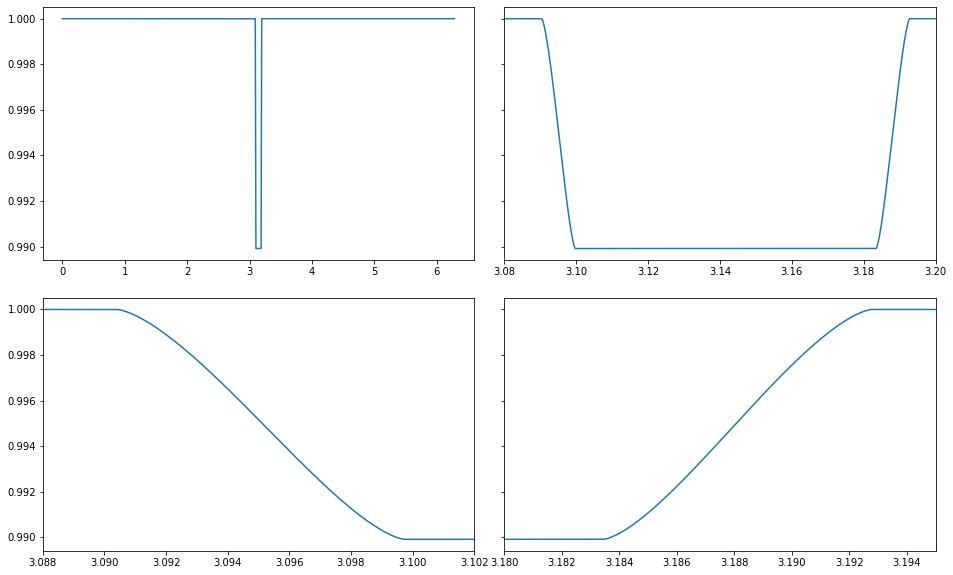

In [6]:
time, flux = simulateLightCurve(rs, rp)
plotLightCurve(time, flux)

Now consider the general case with inclination. As before, let the inclination be $\theta$. Note that the inclination does not affect the maximal depth to the zeroth degree, since the size of the planet is small compared to the size of the star (up until the planet no longer transits the star). The inclination does change the duration of the transit, however.

The apparent motion of the planet in the case of a circular orbit viewed from some non-zero inclination is an ellipse. Then, the projected distance between the centers of the planet and the star has a slightly more complicated relationship with the orbital phase:

$$ d = \sqrt{x^2 + y^2} $$

where

$$ x = a\sin\phi \\ y = a\sin\theta \cos\phi $$

represent the projected distance in the $x$ and $y$ directions, and $\phi$ represents the orbital phase. 

Below, graphs for the orbit at an inclination of $0.01 rad$ and $0.02 rad$ are shown, with the same $x$ axes as in the edge-on case for comparison.

100%|██████████| 1000000/1000000 [00:01<00:00, 917722.53it/s]


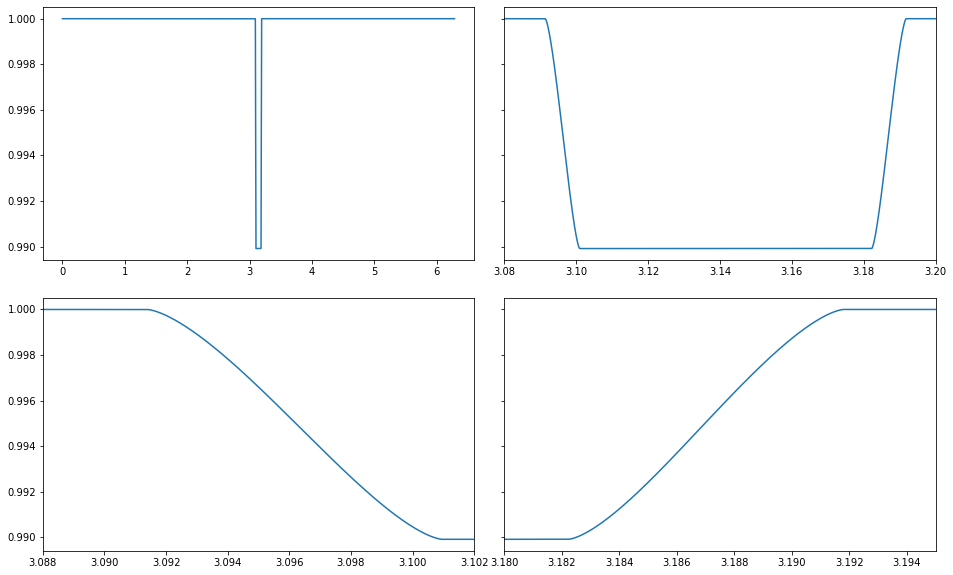

In [7]:
time, flux = simulateLightCurve(rs, rp, 0.01)
plotLightCurve(time, flux)

100%|██████████| 1000000/1000000 [00:01<00:00, 888816.56it/s]


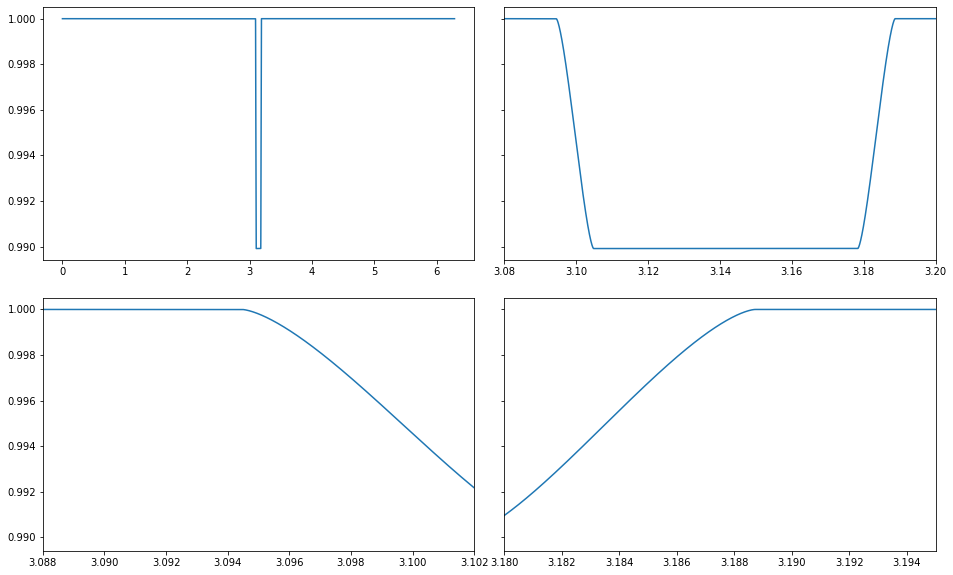

In [8]:
time, flux = simulateLightCurve(rs, rp, 0.02)
plotLightCurve(time, flux)

As expected, as the inclination increases, the start of the transit is delayed, and the overall duration of the transit is shortened.

To calculate the total transit duration for a given inclination, solve for the difference in time between the two instances when projected distance of the centers is exactly the sum of the radii.

$$ T_{transit} = \phi_2 - \phi_1 $$

where $\phi_1$ and $\phi_2$ are two adjacent solutions to

$$ d = r_\odot + r_p $$

$$ (a\sin\phi)^2 + (a\sin\theta\cos\phi)^2 = (r_\odot + r_p)^2 $$

A numerical solution to the equation, and a plot of the duration versus inclination, is below. Note that under the assumption of a circular orbit, the symmetry of the system allows for certain steps to be computed analytically.

In [9]:
divs = 100000
time = np.linspace(np.pi, 3.2, num=divs)

cnt = 100
tht = np.linspace(0, 0.1, num=cnt)
dur = np.zeros((cnt))

x = a * np.sin(time)
y_ = a * np.cos(time)
sintht = np.sin(tht)

cmp = rs + rp
srtord = range(divs)

for i in range(cnt):
    y = sintht[i] * y_
    dist = np.sqrt(x**2 + y**2)
    last = np.searchsorted(dist, cmp, side='left')
    dur[i] = time[last]

dur = 2 * (dur - np.pi)

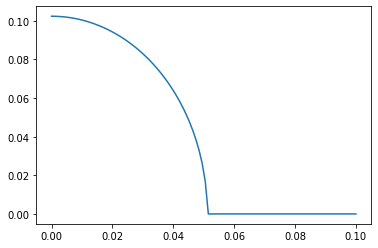

In [10]:
plt.plot(tht, dur)

As can be seen, at around $\theta=0.05 rad$, the planet is no longer transiting in front of the star, and therefore the duration of transit approaches $0$.